# **Research: Pandas Styler**

# Introduction 

For my Pandas project, I demonstrated various and creative ways to visualize data. The visualizations that I made consisted of bar charts, sliders, dropdowns and statistics, and a color-coded DataFrame. One visualization that stuck out to me the most was the color-coded data frame, which I applied a color gradient to the DataFrame, where it colored based on columns (colored based on the maximum value and minimum value of each column). I found inspiration to do this specific visualization from a blog post on DEV Community, a blogging webiste for developers, where it demonstrates ways to tranform Pandas Dataframes by adding color to your tables. When I saw the plot with a color gradient, I knew that I had to try it. So, I tried it, and it worked out...thanks to Chat GPT for helping me make the methods.

The way to do make colorful DataFrames, such as the one I did for my project, is by using **Pandas Styler**. According to Romina Mendex, the blog poster, " Pandas Styler is a module within the Pandas library that provides methods for creating HTML-styled representations of DataFrames...The core functionality of Pandas Styler lies in the ability to highlight, color, and format cells based on specific conditions, facilitating the visual identification of patterns and trends in datasets." In other words, **Pandas Styler** is great because it can desogn DataFrames and visualiize them with HTML and CSS. In addition, there are various methods to make the appearance of your cells more striking. 

Back to the topic about the project, in my conclusion, I mentioned how I would like to learn about new Pandas methods and different ways to visualize data. In this notebook, I accomplish this by reading the blog in full, understanding the code for the visualziations, and applying the code to make new visualizations. 

The format of the notebook is formatted in the way how I did my Pandas project (I guess you can say that this is Part 2 of the project /remix, or a spin off of the blog post). However, this notebook serves as a documentation of my exploration with **Pandas Styler**. Here are the visualizations that I made:

1. **Coloring Cells:**

    a. Coloring the DataFrame in General

    b. Coloring for Specific Values

    c. Coloring for Max and Min

2. **Color Gradients:** 

    a. Listing Possible Color Gradients

    b. Defining Range of Colors in Gradient

    c. Applying the Color Gradient

3. **Highlighting:** 

    a. Highlighting Columns

    b. Highlightng Bar Charts In Cells

Before we get into visualizations, let's import our packages, the data, and create a pivot table with the data.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

# deactivate pandas warning
warnings.filterwarnings('ignore')

In [2]:
# load data
smash= pd.read_csv('cleaned_smash_bros_stats.csv')

# overwrite the 'Full Hop' and 'Weight' columns by dividing by 10
smash['Full Hop'] = smash['Full Hop'] / 100
smash['Weight'] = smash['Weight'] / 100

# dictonary for 'Attack Range' ranks
attack_range_mapping = {
    'SS': 4.5, 'S+': 4.25, 'S': 4, 'S-': 3.75, 
    'A': 3.5, 'B': 3.25, 'B-': 3, 
    'C': 2.75, 'C-': 2.5, 'D': 2.25, 
    'D-': 2, 'E': 1.75, 'E-':1.5 , 
    'F': 1.25, 'F-': 1, 'G': 0.75, 
    'G-': 0.5, 'H': 0.25, 'H-': 0  
}

# convert 'Attack Range' using the dictionary
smash['Attack Range (Numeric)'] = smash['Attack Range'].map(attack_range_mapping)

# drop the Attack Range column
smash = smash.drop(columns=['Attack Range'])

#read the data to see what it looks like 
smash.head()

,Character,Full Hop,Weight,Run Speed,Attack Range (Numeric)
0,Bayonetta,0.3900,0.81,1.760,3.00
1,Bowser,0.3300,1.35,1.971,4.50
2,Bowser Jr.,0.3440,1.08,1.566,2.25
3,Captain Falcon,0.3731,1.04,2.552,1.25
4,Charizard,0.3200,1.16,2.200,4.00


In [3]:
# create a pivot table
pivot = pd.pivot_table(smash, 
                       values=['Full Hop', 'Weight', 'Run Speed', 'Attack Range (Numeric)'],  # get the columns to plot
                       index='Character',    # group the columns by 'Character'
                       aggfunc=np.mean)      # i don't really need to do any math, but this is just here to complete
                                            #the requirements of the method

# it was plotting the 'Character' column a row lower than the rest of the columns because I set it to the index
# i reset it back to being a column
pivot = pivot.reset_index()

# show the pivot table
pivot.head()

,Character,Attack Range (Numeric),Full Hop,Run Speed,Weight
0,Bayonetta,3.00,0.3900,1.760,0.81
1,Bowser,4.50,0.3300,1.971,1.35
2,Bowser Jr.,2.25,0.3440,1.566,1.08
3,Captain Falcon,1.25,0.3731,2.552,1.04
4,Charizard,4.00,0.3200,2.200,1.16


Now we can look at our visualizations:

# 1. Coloring Cells

## 1a. Coloring the DataFrame in General

In this portion of code, I'm adding some styling to the DataFrame to make it look better for representation. I used a deep blue color for the headers and index, while keeping the rest of the data in a light blue for the headers and index, while keeping the rest of the data in a light blue with black text. 

First, I defined styles for the table headers and index by specifying a selector and color properties. Then, I applied those styles to the DataFrame, making it easier to see the structure at a glance. This kind of styling doesn't affect the data itself but helps it make it more readable.

In this code, I created two dictionaries, **headers** and **index_style** to style the headers and index. The background is blue with white textt to make the headings pop. Then, I used **.set_table_styles()** to apply these styles to the headers and index. Finally, I added a light blue  background for the main data xells and black font for readability using **.set_properties()**. It makes the whole table easier to read visually without overhwhelming with too many colors.

In [4]:
# define styles for the header and index cells
# add some color to the table heading with a blue background and white text
headers = {
    'selector': 'th.col_heading',
    'props': 'background-color: #0000FF; color: white;'
}

# add style to the index name (row labels)
index_style = {
    'selector': 'th.index_name',
    'props': 'background-color: #0000FF; color: white;'
}

# apply style to the rest of the DataFrame cells
# color the rest of the table with a light blue background and black text
pivot_style = (
    pivot # this is the DataFrame (or pivoted table) being styled
        .style # start applying styles to the DataFrame
            .set_table_styles([headers,index_style]) # apply the header and index styles defined above
            .set_properties(**{'background-color': '#82CAFF','color': 'black'}) # set table cell colors: light blue background, black text
)

pivot_style

,Character,Attack Range (Numeric),Full Hop,Run Speed,Weight
0,Bayonetta,3.000000,0.390000,1.760000,0.810000
1,Bowser,4.500000,0.330000,1.971000,1.350000
2,Bowser Jr.,2.250000,0.344000,1.566000,1.080000
3,Captain Falcon,1.250000,0.373100,2.552000,1.040000
4,Charizard,4.000000,0.320000,2.200000,1.160000
5,Chrom,3.250000,0.309700,2.145000,0.950000
6,Cloud,3.750000,0.325000,2.167000,1.000000
7,Corrin,3.000000,0.330000,1.595000,0.980000
8,Daisy,2.000000,0.300300,1.595000,0.890000
9,Dark Pit,3.000000,0.310000,1.828000,0.960000


## 1b. Coloring for Specific Values

In this part of the code, I'm applying some custom styling for specific elements in the pivot table. I started by applying the overall styling to the headers and index, followed by a light blie and black color scheme for the rest of the table. However, I wanted to highlight a particular value for 'Run Speed' in row 6, so I applied a darker background with white text to make it stand out.

First, I apply table styles using the previously defines **headers** and **index_style**, ensuring the headers and index have a blue background with white text. Second, I apply the light blue background and black text to the rest of the data for consistent readability. 

Finally, I specifiacally target row 6 under the 'Run Speed' column and give it a dark gray color with white text to highlight it. This can help draw attention to specific values or important data points. 

In [12]:
(
    pivot # start with the 'pivot' DataFrame
        .style # apply styling options to the DataFrame
            .set_table_styles([headers, index_style]) # set styles for headers 
                                                        # and index with the pre-defined blue and white theme
            .set_properties(**{'background-color': '#82CAFF', 'color': 'black'}) # apply a light blue background 
                                                                                 # and black text for the rest of the table
            .set_properties(**{'background-color': '#36454F', 'color': 'white'},subset=pd.IndexSlice[6, 'Run Speed']) # special case: color row 6, 
                                                                                                                     # column 'Run Speed' with a dark gray background and white text)
)

,Character,Attack Range (Numeric),Full Hop,Run Speed,Weight
0,Bayonetta,3.000000,0.390000,1.760000,0.810000
1,Bowser,4.500000,0.330000,1.971000,1.350000
2,Bowser Jr.,2.250000,0.344000,1.566000,1.080000
3,Captain Falcon,1.250000,0.373100,2.552000,1.040000
4,Charizard,4.000000,0.320000,2.200000,1.160000
5,Chrom,3.250000,0.309700,2.145000,0.950000
6,Cloud,3.750000,0.325000,2.167000,1.000000
7,Corrin,3.000000,0.330000,1.595000,0.980000
8,Daisy,2.000000,0.300300,1.595000,0.890000
9,Dark Pit,3.000000,0.310000,1.828000,0.960000


## 1c. Coloring for Max and Min

Here, I'm focusing on highlighting the maximum and minimum values within specific columns of the **pivot** table. I'm working with four columns: 'Full Hop', 'Weight', 'Run Speed', and 'Attack Range (Numeric)'. Here's what I'm doing step-by-step:

First, I select the columns I wwant to focus on for the max and min value highlights. Then, I find the highest (max_value) and lowest (min_value) values from these columns. I define the styles for both max and min values. Tha mex vlaue will get a bold dark gark gray border, while the min value will get a dark blue background. After that, I apply these styles to the DataFrame, for the max and min values. This makes it super easy to spot the highest and lowest stats visually in my table. 

In [6]:
# select the columns that you want to apply the max/min highlighting to
columns = ['Full Hop', 'Weight', 'Run Speed', 'Attack Range (Numeric)']

# get the max and min values across these columns
max_value = pivot[columns].max().max()
min_value = pivot[columns].min().min()

# define the styles for max and min values
max_style = 'border: 4px solid #566D7E !important;'  # style for the max value, applying a dark gray border
min_style = 'background-color: #151A7B;'            # style for the min value, applying a dark blue background

# apply the styles
pivot_style = (
    pivot
        .style # begin applying styles to the DataFrame
            .set_table_styles([headers, index_style])  # reapply the existing header and index styles
            .set_properties(**{'background-color': '#82CAFF', 'color': 'black'})  # set base color styling for the entire DataFrame
            .applymap(lambda x: max_style if x == max_value else '', subset=columns)  # highlight cells with max values using the max style
            .applymap(lambda x: min_style if x == min_value else '', subset=columns)  # highlight cells with min values using the min style
)

pivot_style

,Character,Attack Range (Numeric),Full Hop,Run Speed,Weight
0,Bayonetta,3.000000,0.390000,1.760000,0.810000
1,Bowser,4.500000,0.330000,1.971000,1.350000
2,Bowser Jr.,2.250000,0.344000,1.566000,1.080000
3,Captain Falcon,1.250000,0.373100,2.552000,1.040000
4,Charizard,4.000000,0.320000,2.200000,1.160000
5,Chrom,3.250000,0.309700,2.145000,0.950000
6,Cloud,3.750000,0.325000,2.167000,1.000000
7,Corrin,3.000000,0.330000,1.595000,0.980000
8,Daisy,2.000000,0.300300,1.595000,0.890000
9,Dark Pit,3.000000,0.310000,1.828000,0.960000


# 2. Color Gradients

## 2a. Listing Possible Color Gradients

For this portion, I'm creating and displaying color gradients using different color maps (palettes) to visualize th available color options. I loop through a list of colormmaps (**viridis**, **magma**, **Greens**, and **Reds**), which are predefined color schemes in **matplotlib**. For each colormap, I generate a smooth color grasient that transitions from dark to light by using **np.linspace** to create 256 color steps. I then display the gradient as an image without any axis ( since I just want to show the color), and I label it with the colormap's name. It's super useful when I want to see how different color palettes look beore applying them to my data visualizations.

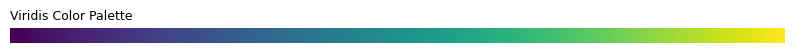

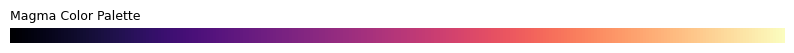

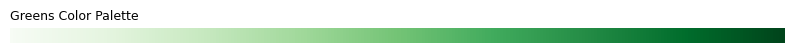

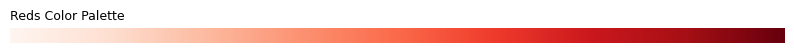

In [7]:
# loop through a list of colormap names to display different color palettes
for cmap_item in ['viridis', 'magma','Greens','Reds']:
    cmap = plt.get_cmap(cmap_item) # get the colormap object based on the current name in the loop
    
    # create a color gradient (1 row of 256 different colors, from 0 to 1)
    gradient = np.linspace(0, 1, 256).reshape(1, -1) # generate a gradient from 0 (dark) to 1 (light) 
                                                     # and reshape it to be a horizontal strip

    # display the color palette
    plt.figure(figsize=(10, 0.2)) # create a figure with a wide and short 
                                  # aspect ratio for better visualization of the gradient
    plt.imshow(gradient, aspect='auto', cmap=cmap)  # display the gradient with the selected colormap applied
    plt.axis('off') # turn off the axis to remove ticks and labels (we only want to see the color)
    plt.title(f'{cmap_item.capitalize()} Color Palette', loc='left', fontsize=9)  # add a title to label the color palette
    plt.show # display the final plot

## 2b. Defining Range of Colors in Gradient

I also use **plt.get_cmap('viridis',lut=20)** to retrieve the the **viridis** colormap with  20 discreet levels of color. The **lut** parameter stands for "lookup table size", which controls how many distinct colors the colormap should have. This helps me see the range of colors but in a simplified way. 

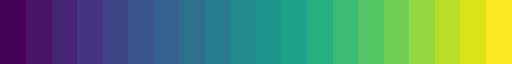

In [8]:
plt.get_cmap('viridis',lut=20)

## 2c. Applying the Color Gradient

Next, I add the color gradient to the table to make it easier to compare the values visually. To do this, I first apply the custom styles for the table headers and the index using **set_table_styles**. This makes sure the top and side labels look consistent with the rest of my styling. Then, I use the **background_gradient** function to apply the **viridis** colormap to the columns I've chosen. This colors the background of the cells, where lower values are darker and higher values are lighter. I specified this gradient only for the important numeric columns, making it easier to see differences between values at a glance.

In [9]:
(
    pivot
        .style 
            .set_table_styles([headers, index_style]) # apply custom styles to the header and index rows
            .background_gradient(cmap='viridis',subset=columns)  # apply the 'viridis' colormap
                                                                 # as a background gradient to the selected columns
)

,Character,Attack Range (Numeric),Full Hop,Run Speed,Weight
0,Bayonetta,3.000000,0.390000,1.760000,0.810000
1,Bowser,4.500000,0.330000,1.971000,1.350000
2,Bowser Jr.,2.250000,0.344000,1.566000,1.080000
3,Captain Falcon,1.250000,0.373100,2.552000,1.040000
4,Charizard,4.000000,0.320000,2.200000,1.160000
5,Chrom,3.250000,0.309700,2.145000,0.950000
6,Cloud,3.750000,0.325000,2.167000,1.000000
7,Corrin,3.000000,0.330000,1.595000,0.980000
8,Daisy,2.000000,0.300300,1.595000,0.890000
9,Dark Pit,3.000000,0.310000,1.828000,0.960000


# 3. Highlighting

## 3a. Listing Possible Color Gradients

In this section of code, I'm styling each column with its own distinct colot to make it visually easier to identify different categories. First, I apply my table styles to keep the headers and index row styles the same way as before. Then I use **set_properties** to color the background of each numeric column differently:

**Attack Range (Numeric)** gets a purple-blue shade with black text.

**Full Hop** gets a lighter blue color, again with black text.

**Run Speed** gets a medium blue.

**Weight** gets a pale blue, all with black text.

In [10]:
(
    pivot
        .style
            .set_table_styles([headers, index_style]) # apply the custom styles for the header and index
            .set_properties(**{'background-color': '#737CA1','color':'black'},subset=['Attack Range (Numeric)']) # set a custom background color for 
                                                                                                                 # 'Attack Range (Numeric)' with black text
    
            .set_properties(**{'background-color': '#6495ED','color':'black'},subset=['Full Hop']) # Custom background color for 
                                                                                                   # 'Full Hop' with black text
    
            .set_properties(**{'background-color': '#728FCE','color':'black'},subset=['Run Speed']) # Custom background color for 
                                                                                                    # 'Run Speed' with black text
    
            .set_properties(**{'background-color': '#98AFC7','color':'black'},subset=['Weight']) # Custom background color for 
                                                                                                 # 'Weight' with black text
)

,Character,Attack Range (Numeric),Full Hop,Run Speed,Weight
0,Bayonetta,3.000000,0.390000,1.760000,0.810000
1,Bowser,4.500000,0.330000,1.971000,1.350000
2,Bowser Jr.,2.250000,0.344000,1.566000,1.080000
3,Captain Falcon,1.250000,0.373100,2.552000,1.040000
4,Charizard,4.000000,0.320000,2.200000,1.160000
5,Chrom,3.250000,0.309700,2.145000,0.950000
6,Cloud,3.750000,0.325000,2.167000,1.000000
7,Corrin,3.000000,0.330000,1.595000,0.980000
8,Daisy,2.000000,0.300300,1.595000,0.890000
9,Dark Pit,3.000000,0.310000,1.828000,0.960000


## 3b. Highlightng Bar Charts In Cells

Here,  I'm combining both color and bar visualizations to highlight key data in a more engaging way. First, I apply the table styles for the headers and index as usual. I set a light purple background for the entire label, and then set the specific columns I'm focusing on to have a white background. This make the columns with the bad charts stand out more. For each column, I add a bar that is color coded, with the colors in the previous visualization. 

In [11]:
(
    pivot
        .style
            .set_table_styles([headers, index_style])  # ppply the same header and index styles as before
            .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})  # apply a light purple background to the entire table with black text
            .set_properties(**{'background-color': 'white', 'color': 'black'}, subset=columns)  # make the specific columns have a white background with black text
            .bar(color='#737CA1', subset=['Attack Range (Numeric)'])  # add a bar visualization for 'Attack Range (Numeric)' with a purple-blue color
            .bar(color='#6495ED', subset=['Full Hop'])  # add a bar for 'Full Hop' using a light blue color
            .bar(color='#728FCE', subset=['Run Speed'])  # add a bar for 'Run Speed' using a medium blue color
            .bar(color='#98AFC7', subset=['Weight'])  # add a bar for 'Weight' with a pale blue color
)

,Character,Attack Range (Numeric),Full Hop,Run Speed,Weight
0,Bayonetta,3.000000,0.390000,1.760000,0.810000
1,Bowser,4.500000,0.330000,1.971000,1.350000
2,Bowser Jr.,2.250000,0.344000,1.566000,1.080000
3,Captain Falcon,1.250000,0.373100,2.552000,1.040000
4,Charizard,4.000000,0.320000,2.200000,1.160000
5,Chrom,3.250000,0.309700,2.145000,0.950000
6,Cloud,3.750000,0.325000,2.167000,1.000000
7,Corrin,3.000000,0.330000,1.595000,0.980000
8,Daisy,2.000000,0.300300,1.595000,0.890000
9,Dark Pit,3.000000,0.310000,1.828000,0.960000


# Conclusion

**Pandas Styler** is a great module for visualzing data in vibrant way. In addition, color can enhance your data because they can serve as indicators or just other ways to measure numbers. In the blog, there were other interesting ways to visualize data. There is a way where you can subsitute elements in an index column with images, as long as the image name matches the element in the index column. In the case of the Super Smash Bros. characters, I could have used this, so instead of seeing the character name, you see the character's image/spite/icon. In fact, I tried this out but I was having trouble so I figured that I could try this again another time ( it's probably a small problem with a simple fix). In addition, instead of using a color gradient for the data, I could have applied a range of emojis to show what place the number stands in terms between the max numebr and minimum number of the column. In other words, it can show how much stronger or weaker the character is in that column with an emoji. Overall, this was a fun exploration, maybe I can go back to my Pandas project and apply this more specfically for the project, and I am excited to try some new visualizations with **Pandas Styler**.

# References

Mendez, R. (2024, January 2). Transform your Pandas Dataframes: Styles, 🎨 Colors, and 😎 Emojis. DEV Community. https://dev.to/r0mymendez/transform-your-pandas-dataframes-styles-colors-and-emojis-2cnh